In [1]:
import json 
import cv2 
import os
import glob
import tqdm

In [2]:
VIDEO_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos"
TRAIN_OR_VAL = "test"

video_paths = sorted(glob.glob(f"{VIDEO_PATH}/{TRAIN_OR_VAL}/*.mp4"))
video_paths_dict = {video_path.split("/")[-1][:-4] : video_path for video_path in video_paths}

print(video_paths_dict)

{'20230707_11_SY3_T1_Camera1_0': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos/test/20230707_11_SY3_T1_Camera1_0.mp4', '20230707_11_SY3_T1_Camera2_1': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos/test/20230707_11_SY3_T1_Camera2_1.mp4', '20230707_11_SY3_T1_Camera2_2': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos/test/20230707_11_SY3_T1_Camera2_2.mp4', '20230707_11_SY3_T1_Camera3_3': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos/test/20230707_11_SY3_T1_Camera3_3.mp4', '20230707_11_SY3_T1_vehicle_view': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos/test/20230707_11_SY3_T1_vehicle_view.mp4', '20230707_14_CN16_T1_Camera1_0': '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/retrieval/videos/test/20230707_14_CN16_T1_Camera1_0.mp4', '20230707_14_CN16_T

In [3]:
OUTPUT_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES"

In [7]:
WEATHER_FEATURE = "road_surface"

In [4]:
for video_name in video_paths_dict:
    vidObj = cv2.VideoCapture(video_paths_dict[video_name])
    video_type = video_paths_dict[video_name].split("/")[-2]
    length = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
    half_point = length//2 # Approximately half if number of frames are odd

    # Set the reader to the given frame number (half_point)
    vidObj.set(cv2.CAP_PROP_POS_FRAMES, half_point)
    success, image = vidObj.read() 

    output_path = f"{OUTPUT_PATH}"
    print(output_path)
    os.makedirs(output_path, exist_ok=True)
    if not os.path.isfile(f"{output_path}/{video_name}.png"):
        if video_name == "video1999":
            continue
        print(success, video_name)
        cv2.imwrite(f"{output_path}/{video_name}.png", image) 

/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_11_SY3_T1_Camera1_0
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_11_SY3_T1_Camera2_1
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_11_SY3_T1_Camera2_2
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_11_SY3_T1_Camera3_3
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_11_SY3_T1_vehicle_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_14_CN16_T1_Camera1_0
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_14_CN16_T1_Camera2_3
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_14_CN16_T1_Camera3_1
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20230707_14_CN16_T1_Camera4_2
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES
True 20

Traceback (most recent call last):
  File "/home/totuanan/Workplace/AICityChallenge2024_Track2/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_53582/4043306459.py", line 8, in <module>
    vidObj.set(cv2.CAP_PROP_POS_FRAMES, half_point)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/totuanan/Workplace/AICityChallenge2024_Track2/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/totuanan/Workplace/AICityChallenge2024_Track2/venv/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/totuanan/Workplace/AICityChallenge2024_Track2/venv/lib/python3.8/site-packages/IPython/core/ultratb.

In [11]:
f = open(f"pedestrian_{WEATHER_FEATURE}.json")
# g = open(f"vehicle_{WEATHER_FEATURE}.json")

pedestrian_data = json.load(f)
# vehicle_data = json.load(g)

for classes in pedestrian_data:
    for video_name in pedestrian_data[classes]:
        vidObj = cv2.VideoCapture(video_paths_dict[video_name])
        video_type = video_paths_dict[video_name].split("/")[-2]
        length = int(vidObj.get(cv2.CAP_PROP_FRAME_COUNT))
        half_point = length//2 # Approximately half if number of frames are odd

        # Set the reader to the given frame number (half_point)
        vidObj.set(cv2.CAP_PROP_POS_FRAMES, half_point)
        success, image = vidObj.read() 

        output_path = f"{OUTPUT_PATH}/{WEATHER_FEATURE}/{classes}/{video_type}"
        print(output_path)
        os.makedirs(output_path, exist_ok=True)
        if not os.path.isfile(f"{output_path}/{video_name}.png"):
            cv2.imwrite(f"{output_path}/{video_name}.png", image) 

# 20230707_29_CN26_T1
# 20230922_44_CN4_T2
         

/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/IMAGES/road_surface/wet/overhead_view
/home/totu

KeyboardInterrupt: 

## Umbrella

In [2]:
!pip install imageai --upgrade

  Using cached imageai-3.0.3-py3-none-any.whl (69 kB)


In [7]:
!pip install ultralytics

     |████████████████████████████████| 716 kB 1.2 MB/s eta 0:00:01     |███████████████████████████▌    | 614 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 2.2 MB/s eta 0:00:011
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)
ERROR: seaborn 0.13.2 has requirement matplotlib!=3.6.1,>=3.4, but you'll have matplotlib 3.3.1 which is incompatible.
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:
      Successfully uninstalled tqdm-4.62.3


In [4]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8x.pt")

# Detect objects from classes 0 and 1 only
classes = [25]

# Set the confidence threshold
conf_thresh = 0.2

# Set the source of the input data (e.g., image file, video file, or folder containing images)
#source = "/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_48_SN47_T1/overhead_view/20230922_48_SN47_T1_192.168.0.28_3.mp4"
umbrella_dict = {}
conf_dict = {}

for key in tqdm.tqdm(video_paths_dict):
    source = video_paths_dict[key]
    # Call the predict function with the specified parameters
    # print(f'Processing {source}')
    results = model.predict(source=source, classes=classes, conf=conf_thresh, stream=True, verbose=False, save=False, vid_stride=60)

    for result in results:
        # if result.probs != None:
        if len(result.boxes.conf) > 1:
            if source not in umbrella_dict:
                umbrella_dict[source] = 0
                print("Video: ", source)
                conf_dict[source] = result.boxes.conf[0]
            umbrella_dict[source] += len(result.boxes.conf)
            conf_dict[source] = min(conf_dict[source], min(result.boxes.conf))
        

gt_video_name = [video for video in glob.glob("/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/weather/rainy/overhead_view/*" ) ]
gt_video_name = set(key.split("/")[-1][:-4] for key in gt_video_name)

predict_video_name = set(key.split("/")[-1][:-4] for key in umbrella_dict.keys())

print(len(umbrella_dict))
print("Precision:", len((gt_video_name & predict_video_name))  / len(predict_video_name)) 
print("Recall:", len(gt_video_name & predict_video_name)  / len(gt_video_name)) 


  4%|▎         | 15/403 [00:39<15:26,  2.39s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230707_25_SY1_T1/overhead_view/20230707_25_SY1_T1_Camera2_1.mp4


  4%|▍         | 16/403 [00:41<14:54,  2.31s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230707_25_SY1_T1/overhead_view/20230707_25_SY1_T1_Camera3_2.mp4


  4%|▍         | 17/403 [00:44<14:46,  2.30s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230707_25_SY1_T1/overhead_view/20230707_25_SY1_T1_Camera4_0.mp4


 10%|█         | 41/403 [01:50<16:03,  2.66s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230728_25_SY22_T1/overhead_view/20230728_25_SY22_T1_Camera3_1.mp4


 20%|█▉        | 79/403 [03:26<14:28,  2.68s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230728_61_SN25_T1/overhead_view/20230728_61_SN25_T1_Camera2_0.mp4


 20%|█▉        | 80/403 [03:29<15:41,  2.92s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230728_61_SN25_T1/overhead_view/20230728_61_SN25_T1_Camera3_1.mp4


 31%|███       | 125/403 [05:27<11:45,  2.54s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_41_SY12_T1/overhead_view/20230922_41_SY12_T1_192.168.0.12_2.mp4


 31%|███▏      | 126/403 [05:30<11:40,  2.53s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_41_SY12_T1/overhead_view/20230922_41_SY12_T1_192.168.0.28_3.mp4


 33%|███▎      | 131/403 [05:42<10:48,  2.38s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_45_CN4_T1/overhead_view/20230922_45_CN4_T1_192.168.0.11_1.mp4


 33%|███▎      | 134/403 [05:50<11:46,  2.63s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_45_CN4_T1/overhead_view/20230922_45_CN4_T1_192.168.0.17_2.mp4


 33%|███▎      | 135/403 [05:52<10:58,  2.46s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_47_SN37_T1/overhead_view/20230922_47_SN37_T1_192.168.0.11_1.mp4


 34%|███▎      | 136/403 [05:55<11:06,  2.50s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_47_SN37_T1/overhead_view/20230922_47_SN37_T1_192.168.0.12_2.mp4


 34%|███▍      | 137/403 [05:57<11:04,  2.50s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_47_SN37_T1/overhead_view/20230922_47_SN37_T1_192.168.0.28_3.mp4


 34%|███▍      | 139/403 [06:02<11:05,  2.52s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_48_SN47_T1/overhead_view/20230922_48_SN47_T1_192.168.0.12_2.mp4


 35%|███▍      | 140/403 [06:05<10:53,  2.49s/it]

Video:  /home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230922_48_SN47_T1/overhead_view/20230922_48_SN47_T1_192.168.0.28_3.mp4


100%|██████████| 403/403 [16:52<00:00,  2.51s/it]

15
Precision: 0.8
Recall: 0.631578947368421


In [12]:
len(umbrella_dict)

gt_video_name = [video for video in glob.glob("/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/weather/rainy/overhead_view/*" ) ]
gt_video_name = set(key.split("/")[-1][:-4] for key in gt_video_name)

predict_video_name = set(key.split("/")[-1][:-4] for key in umbrella_dict.keys())

# len(predict_video_name)

print("Precision:", len((gt_video_name & predict_video_name))  / len(predict_video_name)) 
print("Recall:", len(gt_video_name & predict_video_name)  / len(gt_video_name)) 
# # intersection 
# print("Intersection :", A & B) 
  
# # difference 
print("Precision Difference :", predict_video_name - gt_video_name) 
print("Recall Difference :", gt_video_name - predict_video_name) 
# # symmetric difference 
# print("Symmetric difference :", A ^ B) 
# for 
# umbrella_dict

Precision: 0.8
Recall: 0.631578947368421
Precision Difference : {'20230922_41_SY12_T1_192.168.0.28_3', '20230728_25_SY22_T1_Camera3_1', '20230922_41_SY12_T1_192.168.0.12_2'}
Recall Difference : {'20230922_4_CN10_T1_192.168.0.17_2', '20230922_45_CN4_T1_192.168.0.12_3', '20230922_45_CN4_T1_192.168.0.12_4', '20230922_4_CN10_T1_192.168.0.12_4', '20230922_4_CN10_T1_192.168.0.12_3', '20230922_4_CN10_T1_192.168.0.11_1', '20230922_48_SN47_T1_192.168.0.11_1'}


In [37]:
set(umbrella_dict.keys())

{'/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230707_25_SY1_T1/overhead_view/20230707_25_SY1_T1_Camera2_1.mp4',
 '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230707_25_SY1_T1/overhead_view/20230707_25_SY1_T1_Camera3_2.mp4',
 '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230707_25_SY1_T1/overhead_view/20230707_25_SY1_T1_Camera4_0.mp4',
 '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230728_12_SN45_T1/overhead_view/20230728_12_SN45_T1_Camera3_1.mp4',
 '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230728_25_SY22_T1/overhead_view/20230728_25_SY22_T1_Camera3_1.mp4',
 '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extractor/data/videos/train/20230728_36_SN27_T1/overhead_view/20230728_36_SN27_T1_Camera3_1.mp4',
 '/home/totuanan/Workplace/AICityChallenge2024_Track2/feat_extra

# ENIVRONMENT

In [6]:
ENV_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment"
CLASSES = ["dark", "bright"]
OVERHEAD_OR_VEHICLE = "vehicle_view"

BRIGHT_PATH = f"{ENV_PATH}/bright/{OVERHEAD_OR_VEHICLE}"
DARK_PATH = f"{ENV_PATH}/dark/{OVERHEAD_OR_VEHICLE}"

for img in glob.glob(f"{DARK_PATH}/*.png"):
    img_path = img.split("/")[-1]
    if os.path.isfile(f"{BRIGHT_PATH}/{img_path}"):
        os.remove(f"{BRIGHT_PATH}/{img_path}")

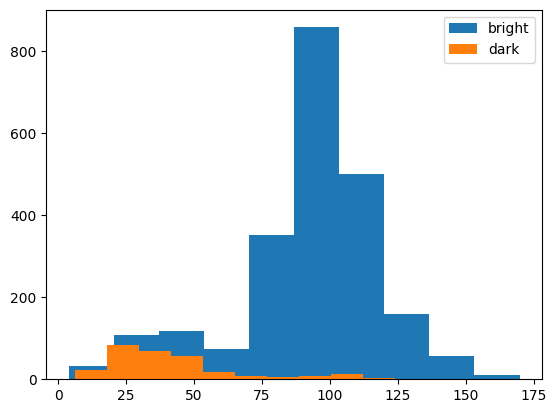

In [7]:
import cv2
import numpy as np
 
# import necessary packages
import matplotlib.pyplot as plt

ENV_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment"
CLASSES = ["dark", "bright"]
OVERHEAD_OR_VEHICLE = "vehicle_view"
img_color = {}

for classes in CLASSES:
    img_color[classes] = []
    for input_img in sorted(glob.glob(f"{ENV_PATH}/{classes}/{OVERHEAD_OR_VEHICLE}/*.png")):
        src_img = cv2.imread(input_img)
        average_color_row = np.average(src_img, axis=0)
        average_color = np.average(average_color_row, axis=0)
        img_color[classes].append(np.average(average_color, axis=0))

plt.hist(img_color["bright"], label="bright")
plt.hist(img_color["dark"], label="dark")
plt.legend()
plt.show()


In [11]:
import pandas as pd

df_bright = pd.DataFrame(img_color["bright"])
df_dark = pd.DataFrame(img_color["dark"])

df_bright.describe()

,0
count,2271.000000
mean,92.039675
std,26.672161
min,3.849740
25%,83.789516
50%,95.643538
75%,107.245190
max,169.804406


In [12]:
df_dark.describe()

,0
count,287.000000
mean,41.839897
std,24.337569
min,6.036689
25%,25.446225
50%,36.069154
75%,47.930228
max,123.990130


In [30]:
df_dark.quantile(0.85)

0    60.732027
Name: 0.85, dtype: float64

# Investigating

In [32]:
import cv2
import numpy as np
 
# import necessary packages
import matplotlib.pyplot as plt

ENV_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment"
OUT_PATH = "/home/totuanan/Workplace/AICityChallenge2024_Track2/datasets/weather_description/environment/label_dark"
CLASSES = ["dark", "bright"]
OVERHEAD_OR_VEHICLE = "vehicle_view"
dark_video_name = []

for classes in CLASSES:
    img_color[classes] = []
    for input_img in sorted(glob.glob(f"{ENV_PATH}/{classes}/{OVERHEAD_OR_VEHICLE}/*.png")):
        src_img = cv2.imread(input_img)
        average_color_row = np.average(src_img, axis=0)
        average_color = np.average(average_color_row, axis=0)
        if np.average(average_color, axis=0) <= 60:
            
            #os.remove(f"{OUT_PATH}/{OVERHEAD_OR_VEHICLE}/{input_img.split('/')[-1]}")
            if not os.path.isfile(f"{OUT_PATH}/{OVERHEAD_OR_VEHICLE}/{input_img.split('/')[-1]}"):
                print("Hit")
                cv2.imwrite(f"{OUT_PATH}/{OVERHEAD_OR_VEHICLE}/{input_img.split('/')[-1]}", src_img)

